---

# GridAPPS-D Python Library

## Getting Started

Before running any of the sample routines in this tutorial, it is first necessary to start the GridAPPS-D Platform and establish a connection to this notebook so that we can start passing calls to the API.

_Open the Ubuntu terminal and start the GridAPPS-D Platform if it is not running already:_

`cd gridappsd-docker`

~/gridappsd-docker$ `./run.sh -t develop`

_Once containers are running,_

gridappsd@[container]:/gridappsd$ `./run-gridappsd.sh`

---

## 1. A First Course in GridAPPSD-Python

GridAPPSD-Python is a Python library that can wrap API calls and pass them to the various GridAPPS-D APIs through the GOSS Message Bus

The library has numerous shortcuts to help you develop applications faster and interface them with other applications, services, and GridAPPS-D compatible software packages.


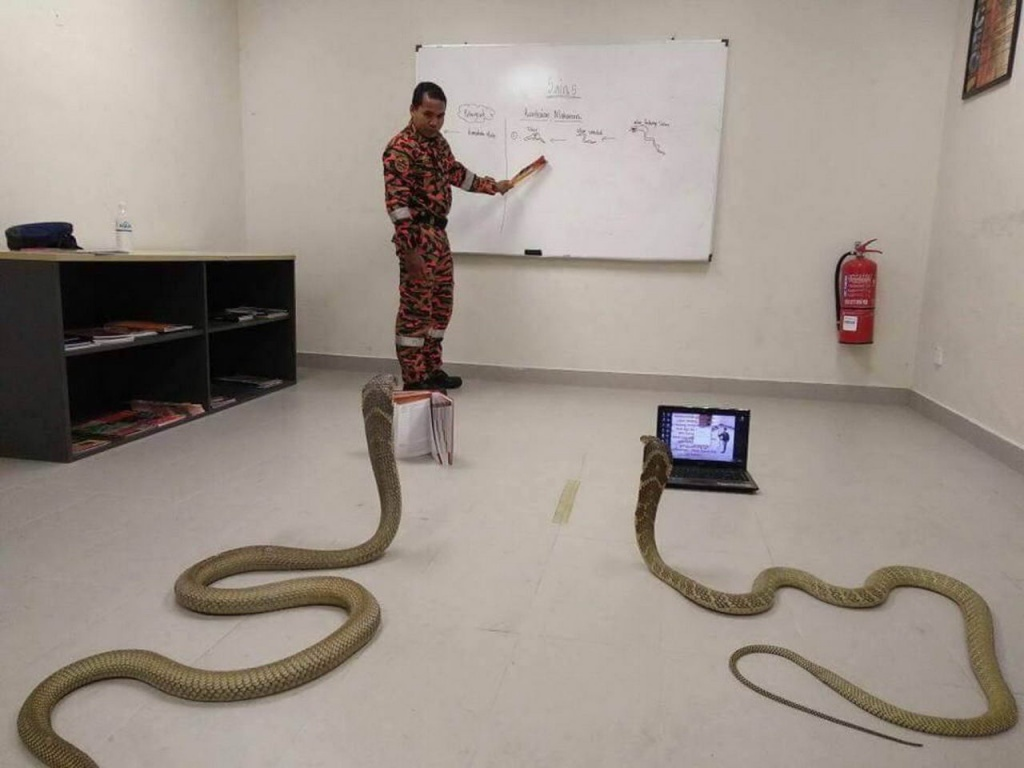



[Return to Top](#Table-of-Contents)

---

---
## 2. Building Blocks of an Application

This section is going to provide an overview of some of the key building blocks of a GridAPPS-D application. 



### 2.1. Import Required Python Libraries

The first step is to import the required libraries. 

Below is a list of some of the additional libraries that you may need to import. 

You may not need all of these additional libraries, depending on the needs of your application

* `argparse` -- This is the recommended command-line parsing module in Python.([Online Documentation](https://docs.python.org/3/howto/argparse.html))

* `json` -- Encoder and decoder for JavaScript Object Notation (JSON). ([Online Documentation](https://docs.python.org/3/library/json.html))

* `logging` -- This module defines classes and functions for event logging. ([Online Documentation](https://docs.python.org/3/library/logging.html)

* `sys` -- Python module for system specific parameters. ([Online Documentation](https://docs.python.org/3/library/sys.html))

* `time` -- Time access and conversions. ([Online Documentation](https://docs.python.org/3/library/time.html))

* `pytz` -- Library to enable resolution of cross-platform time zones and ambiguous times. ([Online Documentation](https://pypi.org/project/pytz/)

* `stomp` -- Python client for accessing messaging servers using the Simple Text Oriented Messaging Protocol (STOMP). ([Online Documentation](https://pypi.org/project/stomp.py/))




In [ ]:
import argparse
import json
import logging
import sys
import time
import pytz
import stomp

---

[Return to Top](#Table-of-Contents)

### 2.2. Import Required GridAPPS-D Libraries

The GridAPPS-Python API contains several libraries, which are used to query for information, subscribe to measurements, and publish commands to the GOSS message bus. These inlcude

`GridAPPSD` -- This is primary library that contains numerous methods and tools that will be dicussed in detail in the subsequent lessons.



`utils` -- A set of utilities to assist with common commands, inlcuding

 

<p style='text-align: left;'> Function Call | <p style='text-align: left;'> Usage
--------------|-----------
<p style='text-align: left;'> _utils.validate_gridappsd_uri()_ | <p style='text-align: left;'> Checks if GridAPPS-D is hosted on the correct port
<p style='text-align: left;' > _utils.get_gridappsd_address()_ | <p style='text-align: left;'> Returns the platform address such that response can be passed directly to a socket or the STOMP library
<p style='text-align: left;'> _utils.get_gridappsd_user()_ | <p style='text-align: left;'> Returns the login username 
<p style='text-align: left;'> _utils.get_gridappsd_pass()_ | <p style='text-align: left;'> Returns the login password
<p style='text-align: left;'> _utils.get_gridappsd_application_id()_ | <p style='text-align: left;'> Only applicable if the environment variable 'GRIDAPPSD_APPLICATION_ID' has been set
<p style='text-align: left;'> utils.get_gridappsd_simulation_id()_ | <p style='text-align: left;'> retrieves the simulation id from the environment.



In [ ]:
from gridappsd import GridAPPSD, utils

---

### 2.3. Establish a Connection to the GridAPPS-D Platform

The next step is to establish a connection with the GridAPPS-D platform so that API calls can be passed and processed. 

This can be done by 1) manually specifying the connection and port or 2) using the GridAPPS-D utils to automatically determine the port

#### Option 1: Manually specify connection parameters

By default, the GridAPPS-D API communicates with the platform on port 61613. 

In [ ]:
gapps = GridAPPSD("('localhost', 61613)", username='system', password='manager')

#### Option 2: Use GridAPPS-D utils to determine connection

The GridAPPS-D utils include several functions to automatically determine the location of the platform and security credentials for passing API commands

In [ ]:
gapps = GridAPPSD(address=utils.get_gridappsd_address(),
          username=utils.get_gridappsd_user(), password=utils.get_gridappsd_pass())

[Return to Top](#Table-of-Contents)

---

### 2.4. Pass a Simple API Call

There are three generic API call routines:

* _send(self, topic, message)_ -- 
* _get_response(self, topic, message)_ -- 
* _subscribe(self, topic, callback)_ -- 

For this example, we will use a very short query to request the MRIDs of the models available in the GridAPPS-D Platform. We will explain how to make various kinds of queries in the upcoming lessons on how to use each API.

The first step is to define the topic, which specifies the channel on which to communicate with the API. The concept of the GridAPPS-D Topic will be introduced in the next lesson. The specific topic definitions and their purposes will be discussed in greater detail in the lessons on each GridAPPS-D API.

In [ ]:
topic = "goss.gridappsd.process.request.data.powergridmodel"

Next, we need to create the message the will be passed. The message must be a valid Python Dictionary or JSON-formated string. The way a message is created, structured, formatted, and parsed is discussed in detail in 

If it is a short query, we can write it as a single line.

In [ ]:
message = {"requestType": "QUERY_MODEL_NAMES", "resultFormat": "JSON"}

If it is a long query, we can break up the lines of the python dictionary object to improve readability:

`message = {
    "key1": "value1",
    "key2": "value2"
}`


In [ ]:
message = {
    "requestType": "QUERY_MODEL_NAMES",
    "resultFormat": "JSON"
}

The GridAPPSD-Python Library then wraps that string and passes it as a message to the API through the GOSS Message Bus.

In [ ]:
gapps.get_response(topic, message)

[Return to Top](#Table-of-Contents)

---